In [9]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

In [3]:
# Load the Boston Housing Dataset from sklearn
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.keys())
print(boston_dataset.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [4]:
# Create the dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


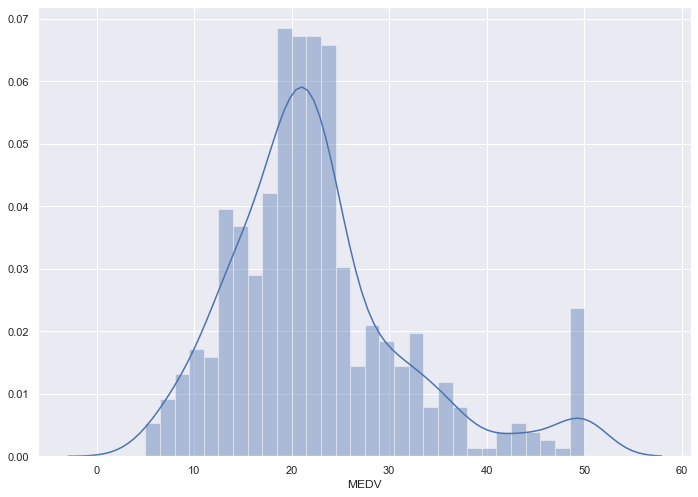

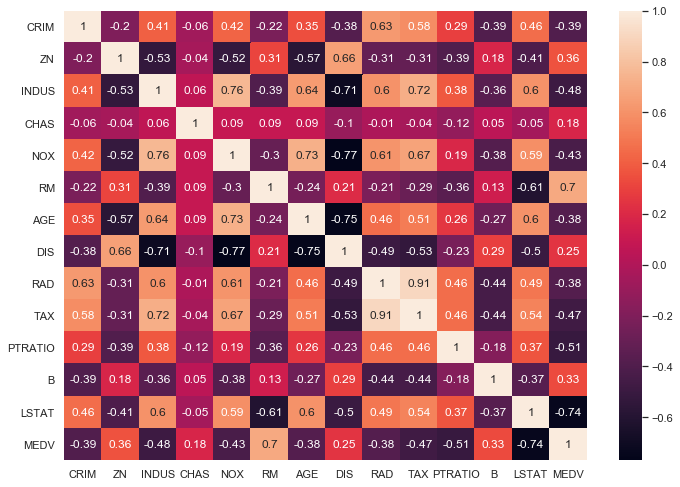

In [11]:
# Introductory Data Analysis
# First, let us make sure there are no missing values or NANs in the dataset
print(boston.isnull().sum())

# Next, let us plot the target vaqriable MEDV

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

# Finally, let us get the correlation matrix
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

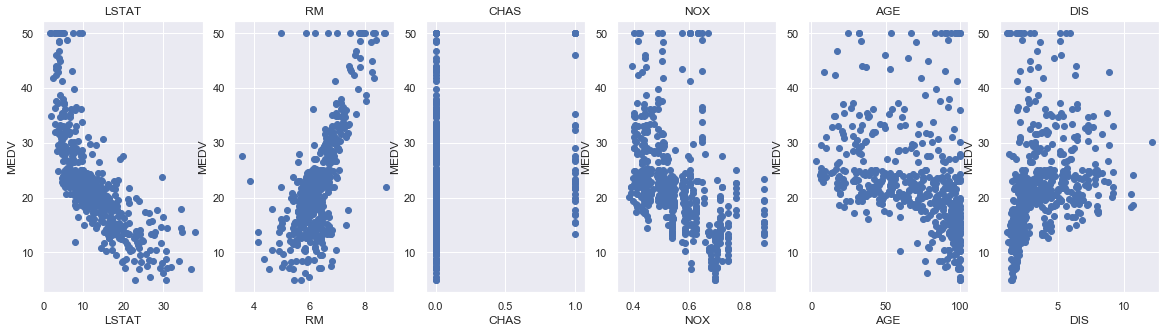

In [14]:
# Let us take few of the features and see how they relate to the target in a 1D plot
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','CHAS','NOX','AGE','DIS']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [42]:
from sklearn.model_selection import train_test_split
X = boston.to_numpy()
X = np.delete(X, 13, 1)
y = boston['MEDV'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [49]:
# Lets now train the model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [54]:
# Model Evaluation
# Lets first evaluate on training set
from sklearn.metrics import r2_score

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

y_pred_train = lin_model.predict(X_train)
rmse_train = rmse(y_pred_train, y_train)
r2_train = r2_score(y_train, y_pred_train)
print("Training RMSE = " + str(rmse_train))
print("Training R2 = " + str(r2_train))

# Let us now evaluate on the test set
y_pred_test = lin_model.predict(X_test)
rmse_test = rmse(y_pred_test, y_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))

# Finally, let us see the learnt weights!
np.set_printoptions(precision=3)
print(lin_model.coef_)

Training RMSE = 4.741000992236516
Training R2 = 0.738339392059052
Test RMSE = 4.568292042303218
Test R2 = 0.7334492147453064
[-1.308e-01  4.940e-02  1.095e-03  2.705e+00 -1.596e+01  3.414e+00
  1.119e-03 -1.493e+00  3.644e-01 -1.317e-02 -9.524e-01  1.175e-02
 -5.941e-01]


In [58]:
# Now, what if we use lesser number of features?
# For example, suppose we choose two of the highly correlated features 'LSTAT' and 'RM'
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
# Training Phase
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Evaluation Phase
y_pred_train = lin_model.predict(X_train)
rmse_train = rmse(y_pred_train, y_train)
r2_train = r2_score(y_train, y_pred_train)
print("Training RMSE = " + str(rmse_train))
print("Training R2 = " + str(r2_train))

# Let us now evaluate on the test set
y_pred_test = lin_model.predict(X_test)
rmse_test = rmse(y_pred_test, y_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test RMSE = " + str(rmse_test))
print("Test R2 = " + str(r2_test))

Training RMSE = 5.6371293350711955
Training R2 = 0.6300745149331701
Test RMSE = 5.137400784702911
Test R2 = 0.6628996975186952
